In [1]:
# Analayzing leave-one-out results in the following manners:
#1. LOO of Spring to Fall alleles - genome wide and by chromsome
#2. Resolvoing pace of adaptive tracking/emergence of fluctuating selection
#3. Quantifying frequency of fluctuating selection across all inteval lengths/comparisons



In [2]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/LOA/loa.orch2021.functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/FinalScripts/orch2021_functions.R")
library('cowplot')

#  1. Spring to Fall LOO

In [19]:
#Data wrangling - getting genome-wide loo results for beginning to end 
##get.NextSegShifts.EcolPhasesLOA function is in orcha
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/SigSites/SigMatched/')
files = list.files(pattern = '10Week')

d.meta.stats = data.frame()
for (file in files[c(2:6, 8:10, 12:13)]){  #exclude cage E3 and E7 b/c no data for tp 1
    d.stats = data.frame()
    loc = strsplit(strsplit(file, '[.]')[[1]][5], 'LOC')[[1]][2]
    d = read.csv(file)
    d.shifts = get.NextSegShifts.EcolPhasesLOA(df.sig.matched = d, RData = paste0('../../../../RData/Downsampled/RData_ByCage/orch2021_Downsampled_',loc,'_Filtered.RData'),
                                    Comp = '1_11', c('1_11'))
    d.stats = get.shift.stats(df.shifts = d.shifts)
    d.stats$LOC = loc
    d.stats = unique(d.stats)
    d.meta.stats = rbind(d.meta.stats, d.stats)
    }


df.new = data.frame()
for (seg in as.character(unique(d.meta.stats$ID.Seg))){
        df.seg = d.meta.stats %>% filter(ID.Seg == seg )
        p.cor.vec = p.adjust(as.numeric(as.vector(df.seg$pvalue)), method = 'BH') 
        df.seg$FDR = p.cor.vec
        df.new = rbind(df.new, df.seg)
    }

write.csv(df.new,'./df.stats.Matched.EcolPhasesLOA.SpToFa.FDR2.csv' , row.names = FALSE)

Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")


In [ ]:
#Data wrangling - Same as above, but by generating median shifts/stats by chromosome 
chroms = c('2L', '2R', '3L', '3R', 'X')

d.meta.meta = data.frame()
for (file in files[c(2:6, 8:10, 12:13)]){
    d.stats.meta = data.frame()
    d = read.csv(file)
    loc = strsplit(strsplit(file, '[.]')[[1]][5], 'LOC')[[1]][2]
    if(loc == 'E7' | loc == 'E3')
    {next}
    d.shifts = get.NextSegShifts.EcolPhasesLOA(df.sig.matched = d, RData = paste0('../../../../RData/Downsampled/RData_ByCage/orch2021_Downsampled_',loc,'_Filtered.RData'),
                                    Comp = '1_11', c('1_11'))
    for (chr in chroms){
        d.shifts.chr = d.shifts %>% filter(chrom == chr)
        d.stats.chr = get.shift.stats(df.shifts = d.shifts.chr)
        d.stats.chr$LOC = loc
        d.stats.chr$chrom = chr
        d.stats.chr = unique(d.stats.chr)
        d.stats.meta = rbind(d.stats.meta, d.stats.chr)
    }
    d.meta.meta = rbind(d.meta.meta, d.stats.meta)
    d.meta.meta = unique(d.meta.meta)
}

d.meta.meta = d.meta.meta %>% mutate(seg.chr = paste0(Test.Seg, chrom))
df.new = data.frame()
for(s.c in as.character(unique(d.meta.meta$seg.chr))){
        df.seg = d.meta.meta %>% filter(seg.chr == s.c )
        p.cor.vec = p.adjust(as.numeric(as.vector(df.seg$pvalue)), method = 'BH') 
        df.seg$FDR = p.cor.vec
        df.new = rbind(df.new, df.seg)
}
write.csv(df.new,'./df.stats.Matched.EcolPhasesLOA.SpToFa.FDR2.BYCHROM.csv' , row.names = FALSE)
    


In [21]:
#Data wrangling - combine genome-wide and chromosome-level results
d = read.csv('./df.stats.Matched.EcolPhasesLOA.SpToFa.FDR2.csv')
d2 = read.csv('./df.stats.Matched.EcolPhasesLOA.SpToFa.FDR2.BYCHROM.csv')
d$chrom = 'Genome'
d2 = d2 %>% dplyr::select(-seg.chr)

d2 = d2 %>% dplyr::select(ID.Seg, Test.Seg, median.matched, median.target, pvalue, LOC, FDR, chrom) 
d = rbind(d, d2)
d = unique(d)
write.csv(d,'./df.stats.Matched.EcolPhasesLOA.SpToFa.FDR2.csv' , row.names = FALSE)

[1] 60  8

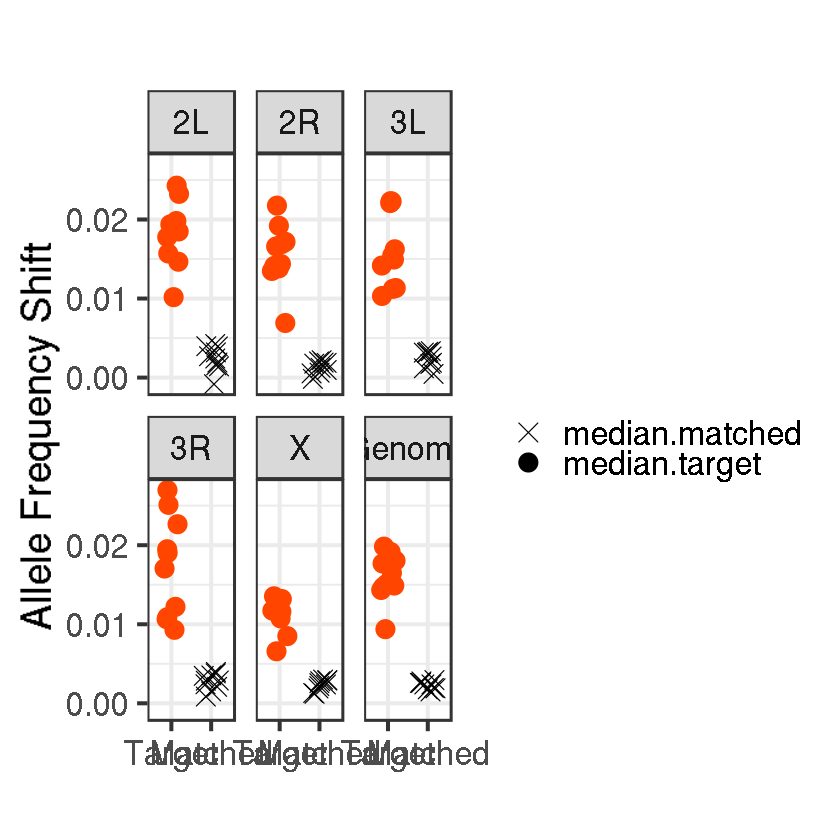

In [22]:
##Plotting 
##Genome-wide and by chromosome
df = read.csv('./df.stats.Matched.EcolPhasesLOA.SpToFa.FDR2.csv')
df = unique(df)
df = na.omit(df)
dim(df)
df = df %>% mutate(sig = ifelse(FDR < 0.05 & abs(median.target) > abs(median.matched), "Significant", "Non-Significant"))
df = df %>% gather(median.matched, median.target, key = 'type', value = 'shift')
df = df %>% mutate(Color = case_when(type == 'median.target' & sig == "Significant" & shift > 0  ~ 'orange red',
                                                type == 'median.target' & sig == "Significant" & shift < 0  ~ 'blue',
                                                type == 'median.target' & sig == "Non-Significant" ~ 'dark grey',
                                                type == 'median.matched' ~ 'black'))

df = df %>% mutate(Test.Seg = case_when(
        Test.Seg == '1_11' ~ '1->11'))




df.meta = df
df.meta = df.meta %>% mutate(SNPs = if_else(type == 'median.matched', 'Matched', 'Target'))

df.meta = df.meta %>% dplyr::select(ID.Seg, Test.Seg, pvalue, LOC, chrom, FDR, sig, type, shift, Color, SNPs)


df.meta$group = factor(df.meta$chrom, levels = c('2L', '2R', '3L', '3R', 'X', 'Genome'))

ggplot((df.meta %>% filter(Test.Seg == '1->11')), aes(x = SNPs, y = shift, colour = Color, shape = type)) +
    geom_jitter(size = 5, width = 0.2,) +
    scale_shape_manual(values = c(median.matched = 4, median.target = 19)) +
    scale_colour_identity() +
    theme_bw(base_size = 25) +
    #theme(legend.position = "none") +
    labs(shape = NULL) +
    ylab("Allele Frequency Shift") +
    ggtitle('') +
    xlab('') +
    scale_x_discrete(limits = c('Target', 'Matched')) +
    facet_wrap(~group)
ggsave('../../../../Figures/ExpandingPhases_LOA_New/SprToFallLOA.ByChrom.ByGen.pdf', height = 12, width = 15)

# 2. Resolve tempo

In [ ]:
##Test spring to fall alleles in increasingly shorter windows and all consecutive time point windows

In [ ]:
#Data wrangle - get phased shifts at target sites and shifts at matched controls for Spring to fall alleles (t1->11) 
###+ all shorter intervals starting at time point 1
###+ all consecutive timepoint intervals

setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/SigSites/SigMatched/')
cages = c('E1', 'E2', 'E4', 'E5', 'E6', 'E8', 'E9', 'E10', 'E11', 'E12')
for (c in cages){
    d = read.csv(paste0('df.sig.Matched.ExpandingPhases.LOC', c, '.10Week.csv'))
    loc = strsplit(strsplit(f, '[.]')[[1]][5], 'LOC')[[1]][2]
    d.shifts = get.NextSegShifts.Final(df.sig.matched = d, paste0('../../../../RData/Downsampled/RData_ByCage/orch2021_Downsampled_',loc,'_Filtered.RData'),
                                    paste0('../../../../RData/Downsampled/LOA_RData/orch2021_ECage_LOA_', loc, '.RData'),
                                    Comp = '1_11', c('1_11', '1_10', '1_9', '1_8', '1_7', '1_6', '1_5', '1_4', '1_3', '1_2'))
    d.stats = get.shift.stats(df.shifts = d.shifts)
    d.stats$LOC = loc
    write.csv(d.stats, paste0('./df.stats.SpToFa.', loc, '.csv'))
}
#Combine output
files = list.files(pattern = 'SpToFa.E')
d.stats.meta = data.frame()
for (f in files){
    d = read.csv(f)
    loc = strsplit(f, '[.]')[[1]][4]
    d.stats.meta = rbind(d.stats.meta, d)
}

##FDR correction
df.new = data.frame()
for (seg in as.character(unique(d.stats.meta$ID.Seg))){
        df.seg = d.stats.meta %>% filter(ID.Seg == seg )
        p.cor.vec = p.adjust(as.numeric(as.vector(df.seg$pvalue)), method = 'BH') 
        df.seg$FDR = p.cor.vec
        df.new = rbind(df.new, df.seg)
}

write.csv(df.new, 'df.stats.Matched.ResolveTempo.FDR2.csv', row.names = FALSE)

df = read.csv('df.stats.Matched.ResolveTempo.FDR2.csv')
df = unique(df)
df = na.omit(df)
write.csv(df, 'df.stats.Matched.ResolveTempo.FDR2.csv', row.names = FALSE)


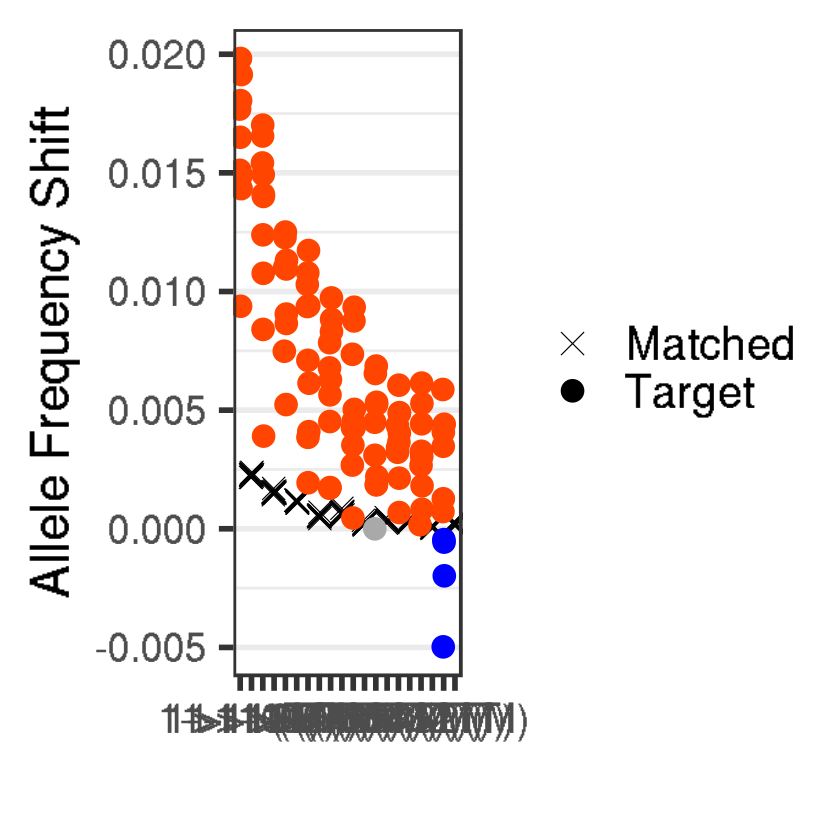

In [3]:
##Plotting - at what point do we not see deterministic change? at what scale to we observe fluctuating selection?
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/SigSites/SigMatched/')

df = read.csv('./df.stats.Matched.ResolveTempo.FDR2.csv')  
df = df %>% mutate(sig = ifelse(FDR < 0.05 & abs(median.target) > abs(median.matched), "Significant", "Non-Significant"))
df = df %>% gather(median.matched, median.target, key = 'type', value = 'shift')
df = df %>% mutate(Color = case_when(type == 'median.target' & sig == "Significant" & shift > 0  ~ 'orange red',
                                                type == 'median.target' & sig == "Significant" & shift < 0  ~ 'blue',
                                                type == 'median.target' & sig == "Non-Significant" ~ 'dark grey',
                                                type == 'median.matched' ~ 'black'))

df = df %>% mutate(type = if_else(type == 'median.matched', 'Matched', 'Target'))

df = df %>% mutate(Test.Seg = case_when(
        Test.Seg == '1_11' ~ '1->11',
        Test.Seg == '1_10' ~ '1->10',
        Test.Seg == '1_9' ~ '1->9',
        Test.Seg == '1_8' ~ '1->8',
        Test.Seg == '1_7' ~ '1->7',
        Test.Seg == '1_6' ~ '1->6',
        Test.Seg == '1_5' ~ '1->5',
        Test.Seg == '1_4' ~ '1->4',
        Test.Seg == '1_3' ~ '1->3',
        Test.Seg == '1_2' ~ '1->2'))
df = df[,-1]
df = unique(df)
df = unique(df)
df = na.omit(df)

df = df %>% mutate(T = ifelse(type == 'Target', 'T', 'M'))

df = df %>% mutate(Test.Seg.Type = paste0(Test.Seg, ' (', T, ')'))
 
p.resolve.tempo = ggplot(df, aes(x = Test.Seg.Type, y = shift, colour = Color, shape = type)) +
    geom_jitter(size = 6, width = 0.1,) +
    scale_shape_manual(values = c(Matched = 4, Target = 19)) +
    scale_colour_identity() +
    theme_bw(base_size = 35) +
    theme(axis.text.x = element_text(size = 25), #15
        axis.text.y = element_text(size = 25),  
        axis.title.y = element_text(size = 32), #20
        legend.text = element_text(size=28),
        legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm')) + #cha
    labs(shape = NULL) +
    #ylim(-0.005, 0.025) +
    ylab("Allele Frequency Shift") +
    #ggtitle('Snps Identified T1->11') +
    theme( # remove the vertical grid lines
           panel.grid.major.x = element_blank()) +
    xlab('') +
    scale_x_discrete(limits = c('1->11 (T)', '1->11 (M)', '1->10 (T)', '1->10 (M)', '1->9 (T)', '1->9 (M)',
                               '1->8 (T)', '1->8 (M)', '1->7 (T)', '1->7 (M)', '1->6 (T)', '1->6 (M)',
                               '1->5 (T)', '1->5 (M)', '1->4 (T)', '1->4 (M)', '1->3 (T)', '1->3 (M)',
                               '1->2 (T)', '1->2 (M)'))
p.resolve.tempo
ggsave('../../../../Figures/ExpandingPhases_LOA_New/ResolveTempo.loa.pdf', height = 10, width = 49.9)


In [23]:
##Using Spring to Fall SNPs as above, but assess dynamics of test/matched in consectuive time point intervals

##Data wrangle - Getting all conseuctive time point interval shift
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/FDR2/Stats_BeRem/')
files = list.files(pattern = '.csv')

d.meta = data.frame()
for (file in files){
    d = read.csv(file)
    loc = strsplit(strsplit(file, '[.]')[[1]][4], 'LOC')[[1]][2]
    int.length = strsplit(file, '[.]')[[1]][5]
    d.fdr = data.frame()
    for(seg in as.character(unique(d$ID.Seg))){
        d.temp = d %>% filter(ID.Seg == seg)
        d.temp = d.temp %>% mutate(FDR = p.adjust(pvalue, method = 'BH'))
        d.fdr = rbind(d.fdr, d.temp)
    }
    d.fdr$LOC = loc
    d.fdr$Int.Length = int.length
    d.meta = rbind(d.meta, d.fdr)
    
}
d.meta = d.meta %>% mutate(sig = ifelse(FDR < 0.05 & abs(median.target) > abs(median.matched), "Significant", "Non-Significant"))

d.meta.long = data.frame()
for (seg in as.character(unique(d.meta$ID.Seg))){
            segment = seg
            tp.a = strsplit(segment, "_")[[1]][1]
            tp.b = strsplit(segment, "_")[[1]][2]
            df.seg = d.meta %>% filter(ID.Seg == segment)
            df.seg = df.seg %>% gather(median.matched, median.target, key = 'type', value = 'shift')
            df.seg = df.seg %>% mutate(Color = case_when(type == 'median.target' & sig == "Significant" & shift > 0  ~ 'orange red',
                                                type == 'median.target' & sig == "Significant" & shift < 0  ~ 'blue',
                                                type == 'median.target' & sig == "Non-Significant" ~ 'dark grey',
                                                type == 'median.matched' ~ 'black'))
            df.seg = df.seg %>% mutate(SNPs = if_else(type == 'median.matched', "Matched", "Target"))
            df.seg = df.seg %>% mutate(Test.Seg = case_when(
                Test.Seg == "1_2" ~ "1->2",
                Test.Seg == "2_3"~  "2->3",
                Test.Seg == "3_4"~  "3->4",
                Test.Seg == "4_5"~  "4->5",
                Test.Seg == "5_6"~  "5->6",
                Test.Seg == "6_7"~  "6->7",
                Test.Seg == "7_8"~  "7->8",
                Test.Seg == "8_9"~  "8->9",
                Test.Seg == "9_10"~  "9->10",
                Test.Seg == '10_11'~  '10->11',
                Test.Seg == '11_12'~  '11->12'))
            df.seg = df.seg %>% rowwise() %>% mutate(id.seg = paste0('SNPs Identified T', tp.a, '->', tp.b))
    d.meta.long = rbind(d.meta.long, df.seg)
    }
d.meta.long = d.meta.long %>% dplyr::select(-ID.Seg) %>% rename(ID.Seg = id.seg) %>%
    dplyr::select(ID.Seg, Test.Seg, pvalue, LOC, FDR, sig, type, shift, Color, SNPs, Int.Length)

d.meta.long = na.omit(d.meta.long)
d.meta.long = unique(d.meta.long)
write.csv(d.meta.long, './df.stats.ExpandingPhases.LOA.Meta.ConsTpt.BERem.FDR.2.csv', row.names = FALSE)

In [4]:
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/FDR2/Stats_BeRem/')

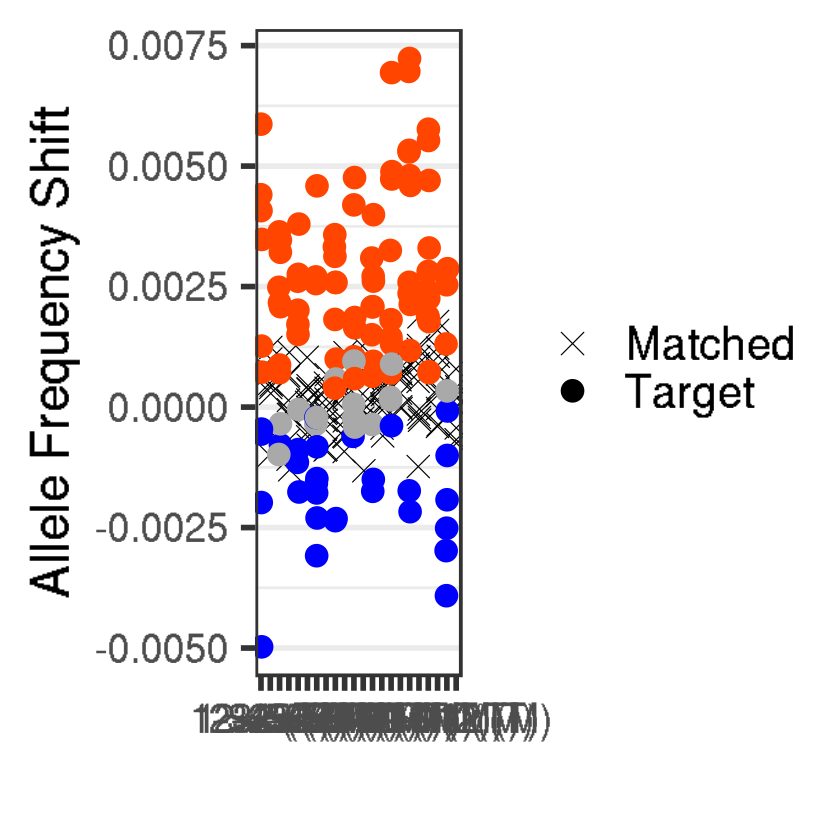

In [7]:
df = read.csv('./df.stats.ExpandingPhases.LOA.Meta.ConsTpt.BERem.FDR.2.csv')
df = df %>% separate(ID.Seg, into = c(NA, 'ID.Seg'), sep = "SNPs Identified ")
df = df %>% filter(ID.Seg == 'T1->11')
df = df %>%  mutate(type = if_else(type == 'median.matched', 'Matched', 'Target'))

df = df[,-1]
df = unique(df)
df = unique(df)
df = na.omit(df)

df = df %>% mutate(T = ifelse(type == 'Target', 'T', 'M'))

df = df %>% mutate(Test.Seg.Type = paste0(Test.Seg, ' (', T, ')'))

p.res.consec = ggplot(df, aes(x = Test.Seg.Type, y = shift, colour = Color, shape = type)) +
    geom_jitter(size = 6, width = 0.1,) +
    scale_shape_manual(values = c(Matched = 4, Target = 19)) +
    scale_colour_identity() +
    theme_bw(base_size = 35) +
    theme(axis.text.x = element_text(size = 25), #15
        axis.text.y = element_text(size = 25),  
        axis.title.y = element_text(size = 32), #20
        legend.text = element_text(size=28),
        legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm')) + #cha
    labs(shape = NULL) +
    ylab("Allele Frequency Shift") +
    #ggtitle('Snps Identified T1->11') +
    theme( # remove the vertical grid lines
           panel.grid.major.x = element_blank()) +
    xlab('') +
    scale_x_discrete(limits = c('1->2 (T)', '1->2 (M)', '2->3 (T)', '2->3 (M)', '3->4 (T)', '3->4 (M)',
                               '4->5 (T)', '4->5 (M)', '5->6 (T)', '5->6 (M)', '6->7 (T)', '6->7 (M)',
                               '7->8 (T)', '7->8 (M)', '8->9 (T)', '8->9 (M)', '9->10 (T)', '9->10 (M)',
                               '10->11 (T)', '10->11 (M)', '11->12 (T)', '11->12 (M)'))
p.res.consec
ggsave('./../../../../Figures/ExpandingPhases_LOA_New/ResolveTempo.ConsecTps.loa.pdf',p.res.consec, height = 10, width = 49.9)


# 3. Quantifying frequency of fluctuaing selection

In [ ]:
####Intra-interval LOO plotting

In [3]:
##Data wrangle - Get all test and matched snp shifts within the segment in which they were identified
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/IntraSegStats/FDR2/Stats_BeRem/')

files = list.files(pattern = '.csv')


d.meta = data.frame()
for (file in files){
    d = read.csv(file)
    loc = strsplit(strsplit(file, '[.]')[[1]][5], 'LOC')[[1]][2]
    int.length = strsplit(file, '[.]')[[1]][6]
    d.fdr = data.frame()
    for(seg in as.character(unique(d$ID.Seg))){
        d.temp = d %>% filter(ID.Seg == seg)
        d.temp = d.temp %>% mutate(FDR = p.adjust(pvalue, method = 'BH'))
        d.fdr = rbind(d.fdr, d.temp)
    }
    d.fdr$LOC = loc
    d.fdr$Int.Length = int.length
    d.meta = rbind(d.meta, d.fdr)
    }
  

d.meta = d.meta %>% mutate(sig = ifelse(FDR < 0.05 & abs(median.target) > abs(median.matched), "Significant", "Non-Significant"))
d.meta.long = data.frame()
for (seg in as.character(unique(d.meta$ID.Seg))){
            segment = seg
            tp.a = strsplit(segment, "_")[[1]][1]
            tp.b = strsplit(segment, "_")[[1]][2]
            df.seg = d.meta %>% filter(ID.Seg == segment)
            df.seg = df.seg %>% gather(median.matched, median.target, key = 'type', value = 'shift')
            df.seg = df.seg %>% mutate(Color = case_when(type == 'median.target' & sig == "Significant" & shift > 0  ~ 'orange red',
                                                type == 'median.target' & sig == "Significant" & shift < 0  ~ 'blue',
                                                type == 'median.target' & sig == "Non-Significant" ~ 'dark grey',
                                                type == 'median.matched' ~ 'black'))
            df.seg = df.seg %>% mutate(SNPs = if_else(type == 'median.matched', "Matched", "Target"))
            df.seg = df.seg %>% separate(Test.Seg, into = c('ta', 'tb'), sep = "_") %>% mutate(Test.Seg = paste0(ta, '->', tb)) %>%
                    dplyr::select(ID.Seg, Test.Seg, pvalue, FDR, LOC, Int.Length, sig, type, shift, Color, SNPs)
            df.seg = df.seg %>% rowwise() %>% mutate(id.seg = paste0('SNPs Identified T', tp.a, '->', tp.b))
    d.meta.long = rbind(d.meta.long, df.seg)
    }


d.meta.long = d.meta.long %>% dplyr::select(-ID.Seg) %>% rename(ID.Seg = id.seg) %>%
    dplyr::select(ID.Seg, Test.Seg, pvalue, LOC, FDR, sig, type, shift, Color, SNPs, Int.Length)
d.meta.long = na.omit(d.meta.long)
d.meta.long = unique(d.meta.long)
write.csv(d.meta.long, './df.stats.ExpandingPhases.LOA.Meta.IntraSeg.BERem.FDR.2.csv', row.names = FALSE)


##combine this data to the consecutive time point shift/stats data (generated above)

setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/')
d.c = read.csv('./FDR2/Stats_BeRem/df.stats.ExpandingPhases.LOA.Meta.ConsTpt.BERem.FDR.2.csv')
d.c$TestInt = 'ConsecutiveTpts'
d.intra =  read.csv('./IntraSegStats/FDR2/Stats_BeRem/df.stats.ExpandingPhases.LOA.Meta.IntraSeg.BERem.FDR.2.csv')
d.intra$TestInt = 'IntraInterval'
d = rbind(d.c, d.intra)
head(d)
write.csv(d, './df.stats.ExpandingPhases.LOA.Meta.BERem.FDR.2.csv', row.names = FALSE)


ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


In [9]:
##Plotting - for each interval length and across all comparisons -
    #plot phased shifts of test snps, and shifts at matched controls across the time points in which they were identified
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/')

df = read.csv('./df.stats.ExpandingPhases.LOA.Meta.BERem.FDR.2.csv')
df = df %>% filter(TestInt == 'IntraInterval')

df = df %>% separate(ID.Seg, into = c(NA, 'ID.Seg'), sep = "SNPs Identified ")
df = df %>%  mutate(type = if_else(type == 'median.matched', 'Matched', 'Target'))

df = df[,-1]
df = unique(df)
df = unique(df)
df = na.omit(df)

df = df %>% mutate(T = ifelse(type == 'Target', 'T', 'M'))

df = df %>% mutate(Test.Seg.Type = paste0(Test.Seg, ' (', T, ')'))

##new plot intra
plot.intra = function(df, int.l, axis){
    ggplot((df %>% filter(Int.Length == int.l)), aes(x = Test.Seg.Type, y = shift, colour = Color, shape = type)) +
    geom_jitter(size = 6, width = 0.1,) +
    scale_shape_manual(values = c(Matched = 4, Target = 19)) +
    scale_colour_identity() +
    theme_bw(base_size = 35) +
    theme(axis.text.x = element_text(size = 25), #15
        axis.text.y = element_text(size = 25),  
        axis.title.y = element_text(size = 32), #20
        legend.text = element_text(size=28),
        legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm')) + #cha
    labs(shape = NULL) +
    ylab("Allele Frequency Shift") +
    #ggtitle('Snps Identified T1->11') +
    theme( # remove the vertical grid lines
           panel.grid.major.x = element_blank()) +
    xlab('') +
    scale_x_discrete(limits = axis)
    }

p.3 = plot.intra(df, '3Week', axis = c('1->4 (T)', '1->4 (M)', '2->5 (T)', '2->5 (M)', '3->6 (T)', '3->6 (M)', 
                                 '4->7 (T)', '4->7 (M)', '5->8 (T)', '5->8 (M)', '6->9 (T)', '6->9 (M)',
                                '7->10 (T)', '7->10 (M)', '8->11 (T)','8->11 (M)', '9->12 (T)', '9->12 (M)'))
ggsave('../../Figures/IntraInt.loa.3Week.pdf',p.3,height = 10, width = 49.9)
p.4 = plot.intra(df, '4Week', axis = c('1->5 (T)', '1->5 (M)', '2->6 (T)', '2->6 (M)', '3->7 (T)', '3->7 (M)', 
                                 '4->8 (T)', '4->8 (M)', '5->9 (T)', '5->9 (M)', '6->10 (T)', '6->10 (M)',
                                '7->11 (T)', '7->11 (M)', '8->12 (T)', '8->12 (M)'))
ggsave('../../Figures/IntraInt.loa.4Week.pdf',p.4,height = 10, width = 45)
p.5 = plot.intra(df, '5Week', axis = c('1->6 (T)', '1->6 (M)', '2->7 (T)', '2->7 (M)', '3->8 (T)', '3->8 (M)', 
                                 '4->9 (T)', '4->9 (M)', '5->10 (T)', '5->10 (M)', '6->11 (T)', '6->11 (M)',
                                '7->12 (T)', '7->12 (M)'))
ggsave('../../Figures/IntraInt.loa.5Week.pdf',p.5,height = 10, width = 40)
p.6 = plot.intra(df, '6Week', axis = c('1->7 (T)', '1->7 (M)', '2->8 (T)', '2->8 (M)', '3->9 (T)', '3->9 (M)', 
                                 '4->10 (T)', '4->10 (M)', '5->11 (T)', '5->11 (M)', '6->12 (T)', '6->12 (M)'))
ggsave('../../Figures/IntraInt.loa.6Week.pdf',p.6,height = 10, width = 35)
p.7 = plot.intra(df, '7Week', axis = c('1->8 (T)', '1->8 (M)', '2->9 (T)', '2->9 (M)', '3->10 (T)', '3->10 (M)', 
                               '4->11 (T)', '4->11 (M)', '5->12 (T)', '5->12 (M)'))
ggsave('../../Figures/IntraInt.loa.7Week.pdf',p.7,height = 10, width = 30)

p.8 = plot.intra(df, '8Week', axis = c('1->9 (T)', '1->9 (M)', '2->10 (T)', '2->10 (M)', '3->11 (T)', '3->11 (M)', '4->12 (T)', '4->12 (M)'))
ggsave('../../Figures/IntraInt.loa.8Week.pdf',p.8,height = 10, width = 25)

p.9 = plot.intra(df, '9Week', axis = c('1->10 (T)', '1->10 (M)', '2->11 (T)', '2->11 (M)', '3->12 (T)', '3->12 (M)'))
ggsave('../../Figures/IntraInt.loa.9Week.pdf',p.9,height = 10, width = 20)

p.10 = plot.intra(df, '10Week', axis = c('1->11 (T)', '1->11 (M)', '2->12 (T)', '2->12 (M)'))
ggsave('../../Figures/IntraInt.loa.10Week.pdf',p.10,height = 10, width = 15)


p.11 = plot.intra(df, '11Week', axis = c('1->12 (T)', '1->12 (M)'))
ggsave('../../Figures/IntraInt.loa.11Week.pdf',p.11,height = 10, width = 10)



#meta-plot w/ all interval lengths
p.meta = plot_grid(p.3 + theme(legend.position="none"),
                   p.4 + theme(legend.position="none") + ylab(''),
                   p.5 + theme(legend.position="none") + ylab(''), 
                   p.6 + theme(legend.position="none") + ylab(''),
                   p.7 + theme(legend.position="none") + ylab(''),
                   p.8 + theme(legend.position="none") + ylab(''),
                   p.9 + theme(legend.position="none") + ylab(''),
                   p.10 + theme(legend.position="none") + ylab(''),
                   p.11 + ylab(''),
                   rel_widths = c(1.9, 1.9, 1.6, 1.5, 1.4, 1.2, 1, 1, 0.6, 1),  nrow = 1)

ggsave('../../Figures/ExpandingPhases_LOA_New/IntraIntShifts.Meta.pdf', p.meta, height = 10, width = 49.99)




In [12]:
###Plot trajectories of shifts in each consecutive time point interval

In [ ]:
##Data wrangle
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/LOA/')
df = read.csv('./df.stats.ExpandingPhases.LOA.Meta.BERem.FDR.2.csv')
df.new = df %>% filter(TestInt == 'ConsecutiveTpts')
df.new$group = factor(df.new$ID.Seg, levels = c('SNPs Identified T2->4', 'SNPs Identified T3->5', 'SNPs Identified T4->6', 'SNPs Identified T5->7','SNPs Identified T6->8', 'SNPs Identified T7->9', 'SNPs Identified T8->10', 'SNPs Identified T9->11', 'SNPs Identified T10->12',                                  
                                               'SNPs Identified T2->5', 'SNPs Identified T4->7', 'SNPs Identified T5->8', 'SNPs Identified T6->9', 'SNPs Identified T7->10', 
                                                'SNPs Identified T8->11','SNPs Identified T9->12', 'SNPs Identified T1->5', 'SNPs Identified T2->6',
                                                'SNPs Identified T3->7','SNPs Identified T4->8', 'SNPs Identified T5->9', 'SNPs Identified T6->10', 
                                                'SNPs Identified T7->11', 'SNPs Identified T8->12', 'SNPs Identified T1->6', 'SNPs Identified T2->7', 
                                                'SNPs Identified T3->8','SNPs Identified T4->9', 'SNPs Identified T5->10', 'SNPs Identified T6->11', 
                                                'SNPs Identified T7->12', 'SNPs Identified T1->7', 'SNPs Identified T2->8', 'SNPs Identified T3->9', 
                                                'SNPs Identified T4->10', 'SNPs Identified T5->11', 'SNPs Identified T6->12', 'SNPs Identified T1->8', 'SNPs Identified T2->9', 
                                                'SNPs Identified T3->10', 'SNPs Identified T4->11', 'SNPs Identified T5->12', 'SNPs Identified T1->9',
                                                'SNPs Identified T2->10', 'SNPs Identified T3->11', 'SNPs Identified T4->12', 'SNPs Identified T1->10', 'SNPs Identified T2->11', 'SNPs Identified T3->12', 
                                                'SNPs Identified T1->11', 'SNPs Identified T2->12', 'SNPs Identified T1->12'))

df.new = df.new %>% rowwise() %>% mutate(id.seg = strsplit(as.character(group), 'd ')[[1]][2])
df.new = df.new %>% rowwise() %>% mutate(tp.a = strsplit((strsplit(id.seg, 'T')[[1]][2]), '->')[[1]][1],
                  tp.b = strsplit((strsplit(id.seg, 'T')[[1]][2]), '->')[[1]][2])  
df.new = df.new %>% mutate(vline.min = ifelse(as.numeric(tp.a > 1), paste0(tp.a, "->", as.numeric(tp.a) + 1), '1->2'),
                  vline.max = ifelse(as.numeric(tp.b) > 11, '11->12', paste0(as.numeric(tp.b) - 1, "->", (as.numeric(tp.b)))))
df.2 = df.new %>% group_by(group) %>% dplyr::select(group, Int.Length, vline.min, vline.max) %>% distinct()
df.new = df.new %>% mutate(Interval = case_when(Test.Seg == '1->2' ~ 1, 
                                                 Test.Seg == '2->3' ~ 2,
                                                Test.Seg == '3->4' ~ 3,
                                                 Test.Seg == '4->5' ~ 4,
                                                 Test.Seg == '5->6' ~ 5,
                                                 Test.Seg == '6->7' ~ 6,
                                                 Test.Seg == '7->8' ~ 7,
                                                 Test.Seg == '8->9' ~ 8,
                                                 Test.Seg == '9->10' ~ 9,
                                                 Test.Seg == '10->11' ~ 10,
                                                 Test.Seg == '11->12' ~ 11)) 
df.new = df.new %>% mutate(col = case_when(sig == 'Significant' & type == 'median.target' & shift > 0 ~ 'orange red',
                                            sig == 'Significant' & type == 'median.target' & shift < 0 ~ 'blue', 
                                            sig == 'Non-Significant' & type == 'median.target' ~ 'grey',
                                            type == 'median.matched' ~ 'grey'))

df.new$Test.Seg = as.factor(df.new$Test.Seg)                    
df.new = df.new %>% mutate(c = case_when(LOC == 'E1' ~  '#E68613',
                                         LOC == 'E2' ~  '#CD9600',
                                         LOC == 'E3' ~  '#ABA300',
                                         LOC == 'E4' ~  '#7CAE00',
                                         LOC == 'E5' ~  '#0CB702',
                                         LOC == 'E6' ~  '#00BE67',
                                         LOC == 'E7' ~  '#00C19A',
                                         LOC == 'E8' ~  '#8494FF',
                                         LOC == 'E9' ~  '#C77CFF',
                                         LOC == 'E10' ~  '#ED68ED',
                                         LOC == 'E11' ~  '#FF61CC',
                                         LOC == 'E12' ~  '#FF68A1'))

df.new$c_category <- as.factor(df.new$c)
df.target = df.new %>% filter(type == 'median.target')
df.matched = df.new %>% filter(type == 'median.matched')
df.new = df.new %>% separate(LOC, into = c(NA, 'LOC'), sep = 'E')
df.new$LOC = factor(df.new$LOC, levels = c('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'))

In [ ]:
#First, plot for a representative 5 time point interval (T4->9) 
plot.traj.b = function(df, int, lims){
    ggplot(df %>% filter(id.seg == int), aes(x = Interval, y = shift, group = LOC)) +
    geom_point(aes(shape = c_category,  fill = c),alpha = 0.8, stroke = 1.5, size = 6) +
    geom_line(colour = 'grey') +
      theme_bw() +
      theme(
        plot.title = element_text(size = 30),
        axis.text.x = element_text(size = 25),
        axis.title.x = element_text(size = 28),
        axis.text.y = element_text(size = 28),
        axis.title.y = element_text(size = 28),
        strip.text = element_text(size = 30),
        legend.title = element_text(size = 22, face = "bold"),  # Customize legend title
        legend.text = element_text(size = 22),
        legend.key.size = unit(0.8, 'cm'), #change legend key size
        legend.key.height = unit(0.6, 'cm'), #change legend key height
        legend.key.width = unit(0.6, 'cm')) + #change legend key width) 

      ylim(lims) +
      scale_shape_manual(
        name = "Replicate",  # Set the legend title for shapes
        values = c(rep(23, 12)),  # Specify shape values (adjust as needed)
        labels = c('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'),
      ) +
      scale_fill_manual(
        name = "Replicate",  # Set the legend title for colors
        values = c('#E68613','#CD9600', '#ABA300', '#7CAE00','#0CB702','#00BE67','#00C19A', '#8494FF','#C77CFF', '#ED68ED','#FF61CC','#FF68A1'),
        labels = c('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
      ) +
      scale_x_discrete(limits = c('1->2', '2->3', '3->4', '4->5', '5->6', '6->7', '7->8', '8->9', '9->10', '10->11', '11->12')) +
      ylab("Allele Frequency Shift") +
      geom_vline(data = df.2 %>% filter(group == paste0('SNPs Identified ', int)), mapping = aes(xintercept = vline.min), linetype = 'dashed', size = 1) +
      geom_vline(data = df.2 %>% filter(group == paste0('SNPs Identified ', int)), mapping = aes(xintercept = vline.max), linetype = 'dashed', size = 1) +
      xlab('Test Interval') 
    }

p.4_9.t = plot.traj.b(df.target, 'T4->9', lims = c(-0.01, 0.01))
p.4_9.m = plot.traj.b(df.matched, 'T4->9', lims = c(-0.01, 0.01))

p.main = plot_grid(p.4_9.t + ggtitle('SNPs identified t4->9') + xlab('') + theme(axis.title.x=element_blank()), p.4_9.m, ncol = 1)
ggsave('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.T4_9.Main.pdf', p.main,height = 10, width = 35)

In [6]:
#Plot - for all 5 to 12 time point intervals/comparisons, plot consecutive tpt interval dynamics
plot.traj.All = function(df, text.size, lims){
    ggplot(df, aes(x = Interval, y = shift, group = LOC)) +
    geom_point(aes(shape = c_category,  fill = c),alpha = 0.8, stroke = 1.5, size = 6) +
    geom_line(colour = 'grey') +
      theme_bw() +
      theme(
        plot.title = element_text(size = 25),
        axis.text.x = element_text(size = text.size),
        axis.title.x = element_text(size = 25),
        axis.text.y = element_text(size = 20),
        axis.title.y = element_text(size = 25),
        strip.text = element_text(size = 20),
        legend.title = element_text(size = 18, face = "bold"),  # Customize legend title
        legend.text = element_text(size = 18),
        legend.key.size = unit(0.8, 'cm'), #change legend key size
        legend.key.height = unit(0.6, 'cm'), #change legend key height
        legend.key.width = unit(0.6, 'cm')) + #change legend key width) 

      scale_shape_manual(
        name = "Replicate",  # Set the legend title for shapes
        values = c(rep(23, 12)),  # Specify shape values (adjust as needed)
        labels = c('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'),
      ) +
      scale_fill_manual(
        name = "Replicate",  # Set the legend title for colors
        values = c('#E68613','#CD9600', '#ABA300', '#7CAE00','#0CB702','#00BE67','#00C19A', '#8494FF','#C77CFF', '#ED68ED','#FF61CC','#FF68A1'),
        labels = c('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
      ) +
      scale_x_discrete(limits = c('1->2', '2->3', '3->4', '4->5', '5->6', '6->7', '7->8', '8->9', '9->10', '10->11', '11->12')) +
      ylab("Allele Frequency Shift") +
    ylim(lims) +
      #geom_vline(data = df.2 %>% filter(group == paste0('SNPs Identified ', int)), mapping = aes(xintercept = vline.min), linetype = 'dashed', size = 1) +
      #geom_vline(data = df.2 %>% filter(group == paste0('SNPs Identified ', int)), mapping = aes(xintercept = vline.max), linetype = 'dashed', size = 1) +
      xlab('Test Interval') +
    facet_wrap(.~ group, nrow = 1)
    }

p.t = plot.traj.All(df.target %>% filter(Int.Length == '5Week'), text.size = 13, lims = c(-0.023, 0.023)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '5Week'), text.size = 13, lims = c(-0.023, 0.023)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.5Week.pdf'),p, height = 10, width = 49.99)

p.t = plot.traj.All(df.target %>% filter(Int.Length == '6Week'), text.size = 14, lims = c(-0.013, 0.013)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '6Week'), text.size = 14, lims = c(-0.013, .012)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.6Week.pdf'),p, height = 10, width = 49.99)


p.t = plot.traj.All(df.target %>% filter(Int.Length == '7Week'), text.size = 16, lims = c(-0.012, 0.012)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '7Week'), text.size = 16, lims = c(-0.012, 0.012)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.7Week.pdf'),p, height = 10, width = 48)


p.t = plot.traj.All(df.target %>% filter(Int.Length == '8Week'), text.size = 18, lims = c(-0.01, 0.01)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '8Week'), text.size = 18, lims = c(-0.01, 0.01)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.8Week.pdf'),p, height = 10, width = 48)


p.t = plot.traj.All(df.target %>% filter(Int.Length == '9Week'), text.size = 18, lims = c(-0.01, 0.01)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '9Week'), text.size = 18, lims = c(-0.01, 0.01)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.9Week.pdf'),p, height = 10, width = 42)

p.t = plot.traj.All(df.target %>% filter(Int.Length == '10Week'), text.size = 18, lims = c(-0.01, 0.01)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '10Week'), text.size = 18, lims = c(-0.01, 0.01)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.10Week.pdf'),p, height = 10, width = 35)

p.t = plot.traj.All(df.target %>% filter(Int.Length == '11Week'), text.size = 18, lims = c(-0.01, 0.01)) + xlab('') + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
p.m = plot.traj.All(df.matched %>% filter(Int.Length == '11Week'), text.size = 18, lims = c(-0.01, 0.01)) + theme(
              strip.background = element_blank(),
              strip.text.x = element_blank())
p = plot_grid(p.t, p.m, nrow = 2)
ggsave(paste0('../../Figures/ExpandingPhases_LOA_New/Cage.Traj.11Week.pdf'),p, height = 10, width = 30)


In [27]:
##Enumerate fluctuations (flip from target snps predominately favored to selected against (or vice versa))

#Count flips function
count.flips = function(colors){
    # Sample time series data
    time_series <- colors
    
    # Count transitions from 'red' to 'blue'
    red_to_blue_count <- 0

    # Count transitions from 'blue' to 'red'
    blue_to_red_count <- 0

    # Iterate through the time series
    for (i in 2:length(time_series)) {
      current_state <- time_series[i]
      previous_state <- time_series[i - 1]

      if (previous_state == 'red' && current_state == 'blue') {
        red_to_blue_count <- red_to_blue_count + 1
      } else if (previous_state == 'blue' && current_state == 'red') {
        blue_to_red_count <- blue_to_red_count + 1
      } else if (previous_state == 'red' && current_state == 'black') {
        # Check if there is a transition from 'red' to 'blue' via any number of 'black' states
        j <- i + 1
        while (j <= length(time_series) && time_series[j] != 'red') {
          if (time_series[j] == 'blue') {
            red_to_blue_count <- red_to_blue_count + 1
            break
          }
          j <- j + 1
        }
      } else if (previous_state == 'blue' && current_state == 'black') {
        # Check if there is a transition from 'blue' to 'red' via any number of 'black' states
        j <- i + 1
        while (j <= length(time_series) && time_series[j] != 'blue') {
          if (time_series[j] == 'red') {
            blue_to_red_count <- blue_to_red_count + 1
            break
          }
          j <- j + 1
        }
      }
    }

    return(red_to_blue_count + blue_to_red_count)
    }


d.meta = read.csv('./FDR2/Stats_BeRem/df.stats.ExpandingPhases.LOA.Meta.ConsTpt.BERem.FDR.2.csv')
d.meta = d.meta %>% rowwise() %>% separate(ID.Seg, into = c(NA, 'comparison'), sep = 'SNPs Identified ', remove = FALSE)
d.meta = d.meta %>% mutate(state = case_when(
                    Color == 'blue' ~ 'blue',
                    Color == 'orange red' ~ 'red',
                    Color == 'dark grey' ~ 'black'))


##just look at target (not matched) sites and interval lengths >= 5 tpt
d.target = d.meta %>% filter(type == 'median.target')
d.target = d.target %>% filter(!Int.Length %in% c('2Week', '3Week', '4Week'))
#get a new test.seg column to arrange by and ensure that the series is in proper order for counting the flips
d.target = d.target %>% mutate(test.seg = case_when(
            Test.Seg == '1->2' ~ '01->02',
            Test.Seg == '2->3' ~ '02->03',
            Test.Seg == '3->4' ~ '03->04',
            Test.Seg == '4->5' ~ '04->05',
            Test.Seg == '5->6' ~ '05->06',
            Test.Seg == '6->7' ~ '06->07',
            Test.Seg == '7->8' ~ '07->08',
            Test.Seg == '8->9' ~ '08->09',
            Test.Seg == '9->10' ~ '09->10',
            Test.Seg == '10->11' ~ '10->11',
            Test.Seg == '11->12' ~ '11->12'))

#alter interval length to just be number time points (not weeks)
d.target = d.target %>% mutate(Int.Length = case_when(
            Int.Length == '2Week' ~ '2 Tpt',
            Int.Length == '3Week' ~ '3 Tpt',
            Int.Length == '4Week' ~ '4 Tpt',
            Int.Length == '5Week' ~ '5 Tpt',
            Int.Length == '6Week' ~ '6 Tpt',
            Int.Length == '7Week' ~ '7 Tpt',
            Int.Length == '8Week' ~ '8 Tpt',
            Int.Length == '9Week' ~ '9 Tpt',
            Int.Length == '10Week' ~ '10 Tpt',
            Int.Length == '11Week' ~ '11 Tpt'))



In [28]:
head(d.target)

ID.Seg,comparison,Test.Seg,pvalue,LOC,FDR,sig,type,shift,Color,SNPs,Int.Length,state,test.seg
<fct>,<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>
SNPs Identified T1->11,T1->11,1->2,8.238590e-41,E1,8.987553e-41,Significant,median.target,-0.00056065,blue,Target,10 Tpt,blue,01->02
SNPs Identified T1->11,T1->11,2->3,0.000000e+00,E1,0.000000e+00,Significant,median.target,0.00346200,orange red,Target,10 Tpt,red,02->03
SNPs Identified T1->11,T1->11,3->4,0.000000e+00,E1,0.000000e+00,Significant,median.target,0.00171600,orange red,Target,10 Tpt,red,03->04
SNPs Identified T1->11,T1->11,4->5,0.000000e+00,E1,0.000000e+00,Significant,median.target,-0.00230085,blue,Target,10 Tpt,blue,04->05
SNPs Identified T1->11,T1->11,5->6,0.000000e+00,E1,0.000000e+00,Significant,median.target,0.00181835,orange red,Target,10 Tpt,red,05->06
SNPs Identified T1->11,T1->11,6->7,3.422026e-186,E1,4.562701e-186,Significant,median.target,0.00104410,orange red,Target,10 Tpt,red,06->07


In [29]:
data.flips.meta = data.frame()
for (comp in as.character(unique(d.target$ID.Seg))){
    d.comp = d.target %>% filter(ID.Seg == comp)
    int.length = as.character(unique(d.comp$Int.Length))
    for (loc in as.character(unique(d.comp$LOC))){
        d.comp.loc = d.comp %>% filter(LOC == loc)
        d.comp.loc = d.comp.loc %>% arrange(test.seg) ##make sure the series is in the proper order
        colors = (d.comp.loc %>% filter(LOC == loc))$state
        n.flips = count.flips(colors)
        df = cbind(int.length, comp, loc, n.flips)
        data.flips.meta = rbind(data.flips.meta, df)
    }
}
data.flips.meta = unique(data.flips.meta)
data.flips.meta = data.flips.meta %>% mutate(n.flips = as.numeric(as.character(n.flips)))
write.csv(data.flips.meta, '../NFlips.FDR2.csv', row.names = FALSE)

In [30]:
d.total = read.csv('../NFlips.FDR2.csv')
d.total = d.total %>% mutate(comp = 'All Intervals', int.length = 'All Intervals')
data.flips.meta = rbind(data.flips.meta, d.total)
data.flips.meta %>% group_by(int.length) %>%
summarise(median.flips = median(n.flips), mean.flips = mean(n.flips))

int.length,median.flips,mean.flips
<fct>,<dbl>,<dbl>
10 Tpt,4.0,3.458333
11 Tpt,3.5,3.583333
5 Tpt,5.0,4.464286
6 Tpt,4.0,4.444444
7 Tpt,4.0,4.416667
8 Tpt,4.0,4.062500
9 Tpt,4.0,3.611111
All Intervals,4.0,4.199405


In [40]:
head(data.flips.meta)

,int.length,comp,loc,n.flips
,<fct>,<fct>,<fct>,<dbl>
1,10 Tpt,SNPs Identified T1->11,E1,6
2,10 Tpt,SNPs Identified T1->11,E10,6
3,10 Tpt,SNPs Identified T1->11,E11,2
4,10 Tpt,SNPs Identified T1->11,E12,0
5,10 Tpt,SNPs Identified T1->11,E2,6
6,10 Tpt,SNPs Identified T1->11,E3,2


In [42]:
#how many flips for focal 5 time point interval (t4->9)
median((data.flips.meta %>% filter(comp == 'SNPs Identified T4->9'))$n.flips)

[1] 5

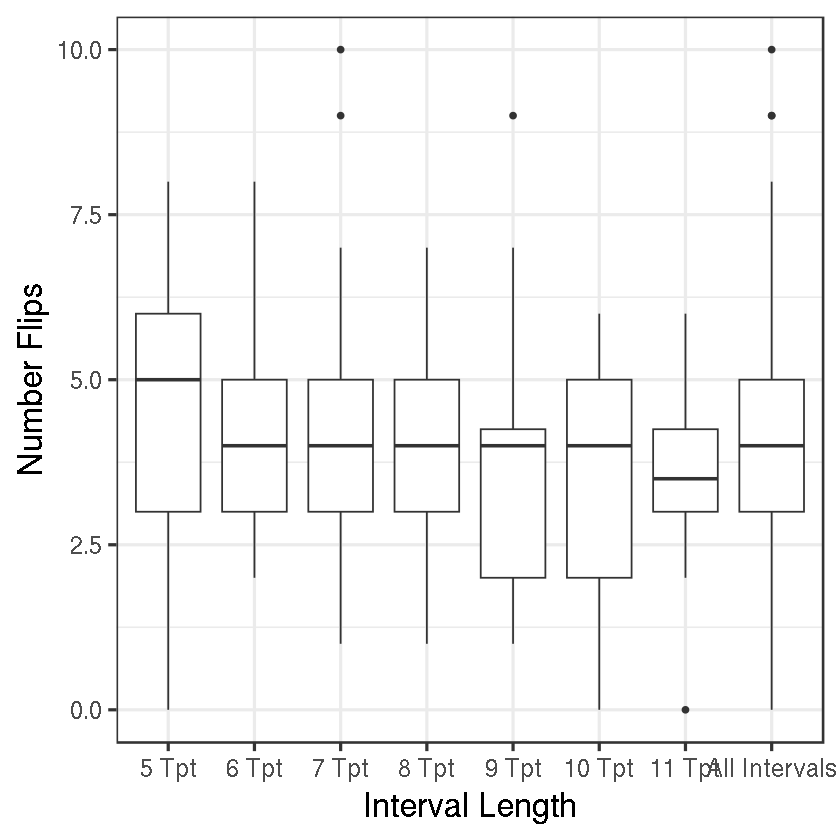

In [44]:
p = ggplot(data.flips.meta, aes(y = n.flips, x = int.length)) +
    geom_boxplot() + 
    theme_bw(base_size = 20) +
    ylab('Number Flips') +
    xlab('Interval Length') +
    scale_x_discrete(limits = c('5 Tpt', '6 Tpt', '7 Tpt', 
                                '8 Tpt', '9 Tpt', '10 Tpt', '11 Tpt', 'All Intervals'))
p
ggsave('../NFlips.Meta.pdf',p,  height = 10, width = 15)

ggsave( '../../Figures/ExpandingPhases_LOA_New/NFlips.Meta.pdf', height = 10, width = 15)

In [9]:
df.new = df.new %>% mutate(SNPs = if_else(type == 'median.matched', 'Matched', 'Target'))



	F test to compare two variances

data:  (df.new %>% filter(type == "median.matched"))$shift and (df.new %>% filter(type == "median.target"))$shift
F = 0.17297, num df = 5520, denom df = 5520, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1640767 0.1823386
sample estimates:
ratio of variances 
         0.1729668 


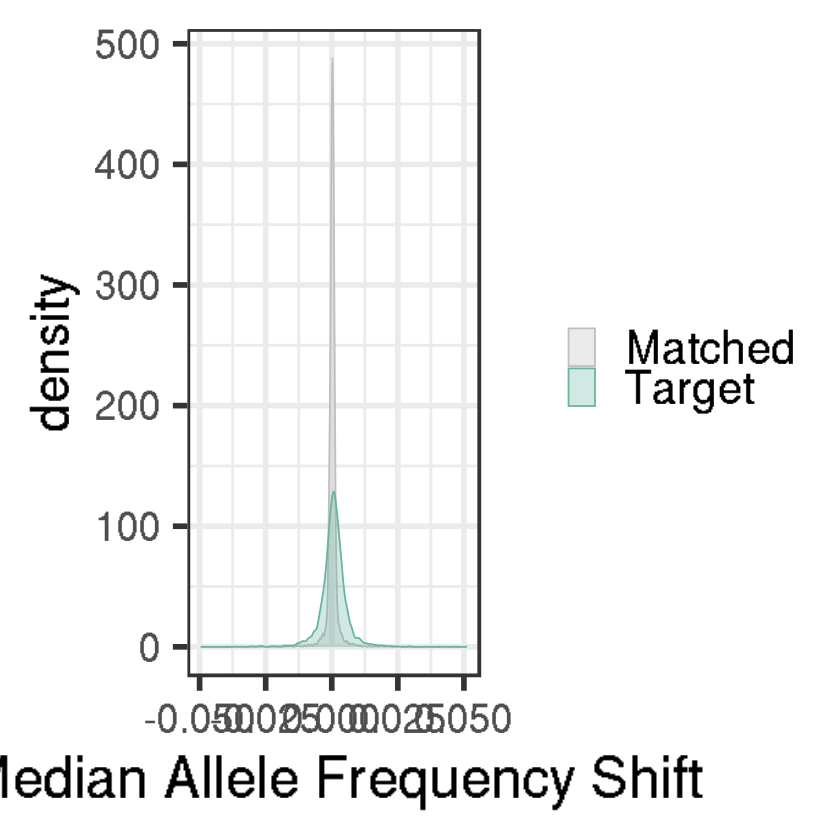

In [13]:
###Plot - distribution of median shifts of target site vs. matched sites for all 5 tpt intervals
df.new = df.new %>% mutate(SNPs = if_else(type == 'median.matched', 'Matched', 'Target'))

p.all = ggplot(df.new, aes(x = shift, colour = SNPs, fill = SNPs)) +
    geom_density(alpha = 0.3) +
    scale_fill_manual(values=c("grey", "#69b3a2")) +
    scale_colour_manual(values=c("grey", "#69b3a2")) +
    theme(legend.title= element_blank()) +
    xlab('Median Allele Frequency Shift') +
    theme_bw(base_size = 35) +
    theme(axis.text.x = element_text(size = 25), #15
        axis.text.y = element_text(size = 25),  
        axis.title.y = element_text(size = 32), #20
        legend.text = element_text(size=28)) +
    theme(legend.title= element_blank())
    #guides(fill = guide_legend(reverse = TRUE), color = guide_legend(reverse = TRUE))
var.test((df.new %>% filter(type == 'median.matched'))$shift, (df.new %>% filter(type == 'median.target'))$shift, alternative = "two.sided")
p.all
ggsave('../../Figures/ExpandingPhases_LOA_New/AFShiftDensity.5TptInt.pdf', p.all, height = 10, width = 15)

